In [1]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from math import pi

In [2]:
data = np.loadtxt("../data/processed/newPartonMatchedJetsNoRecoPtCut.txt", skiprows=2)

In [3]:
def normPDF(x, mean, stdDev):
    return (1/(np.sqrt(2*pi*stdDev**2))) * np.exp(-0.5*((x-mean)/stdDev)**2)
    #return (1/(np.sqrt(2*pi*var))) * np.exp(-(x-mean)**2)/(2*var)

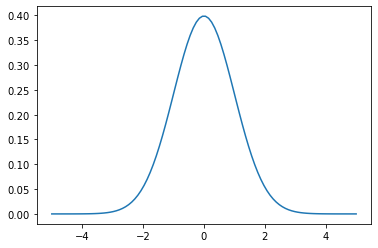

In [4]:
x = np.linspace(-5, 5, 100)
pdf = normPDF(x, 0, 1)
plt.plot(x, pdf)

16.350957428632753
8.538360659098709


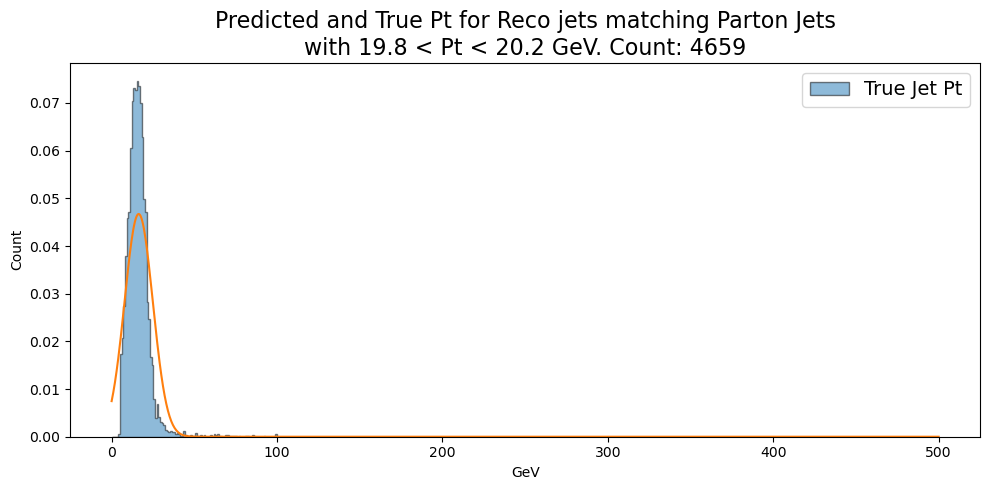

44.21815654405221
12.621166767951566


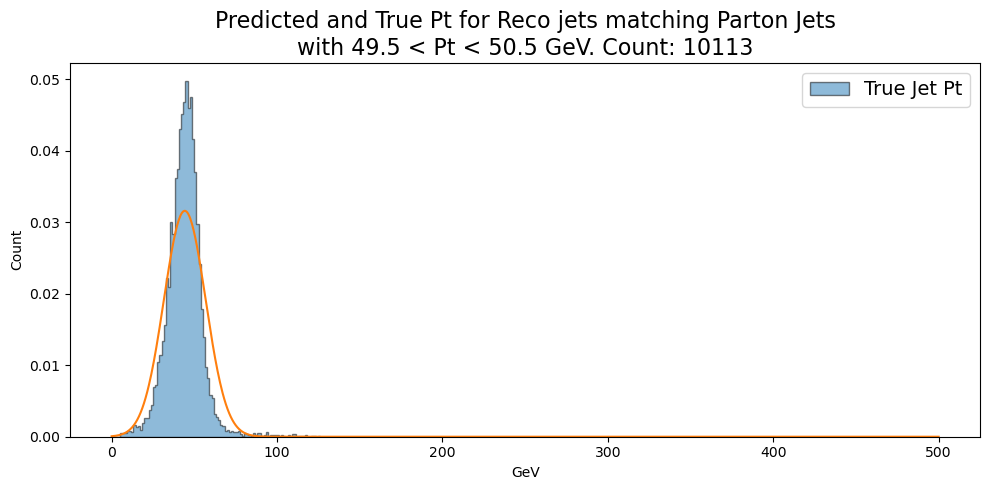

66.48182563360882
13.429877988368673


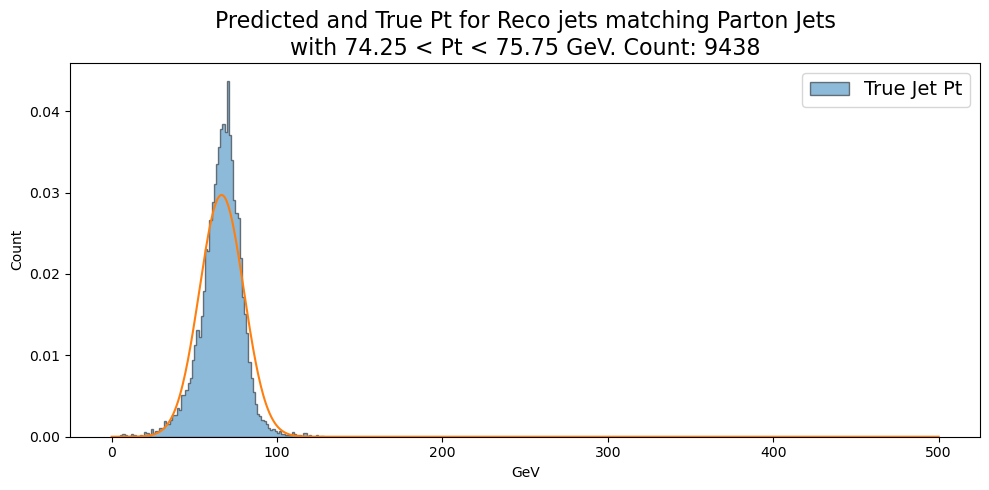

88.94755300285988
15.740686651009602


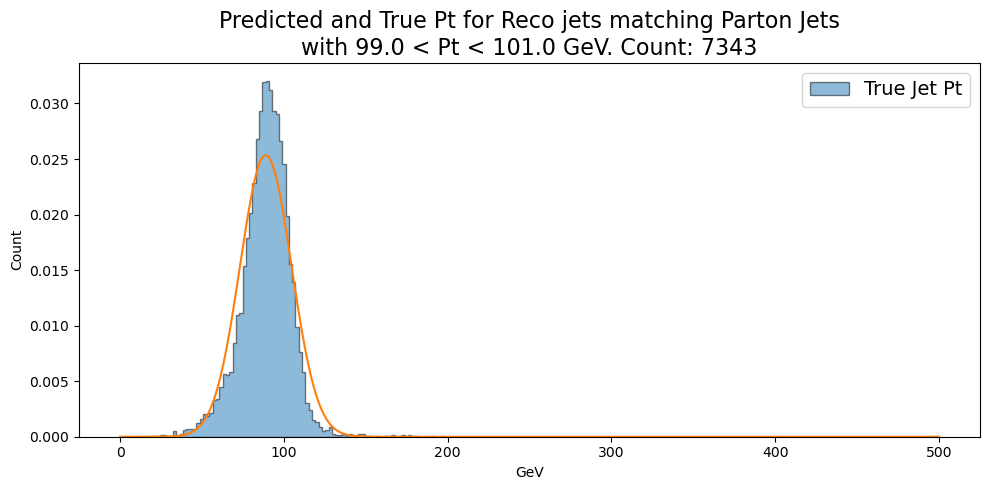

111.33263528225807
19.31445436308911


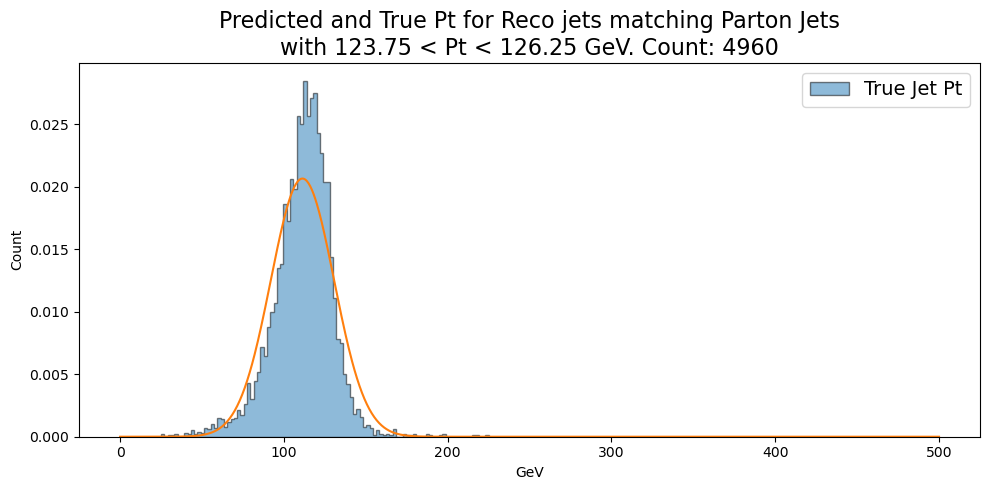

134.18563038953315
21.738936990480312


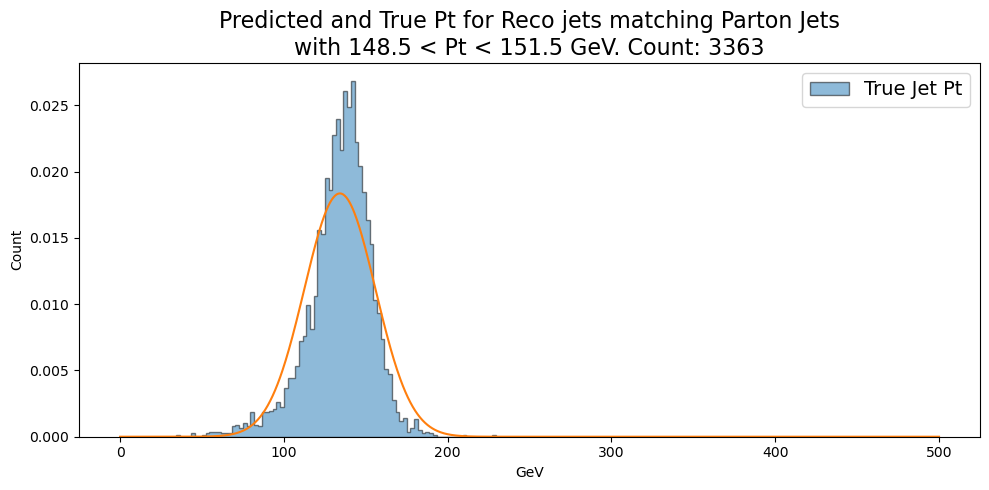

180.17765991189427
25.113860481572885


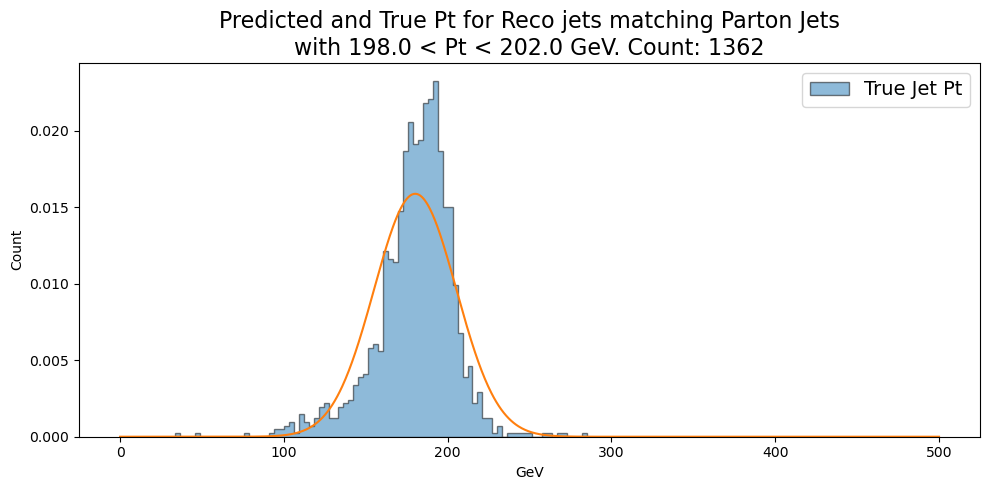

227.31962574102965
30.02869606937043


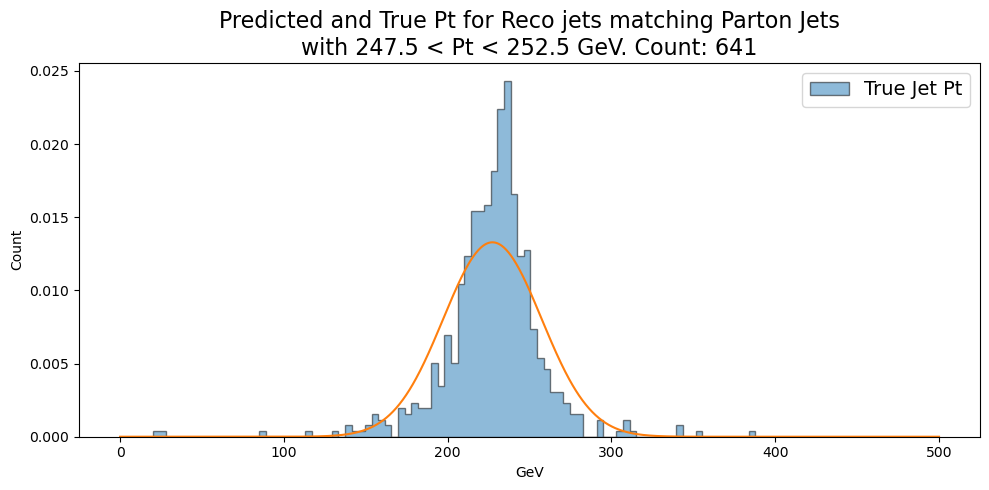

275.27421104651165
37.0494799475411


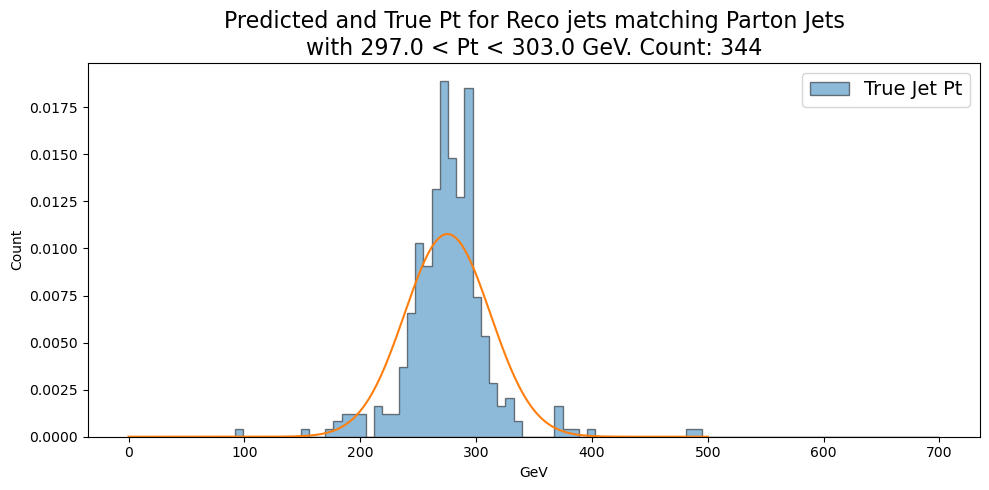

546.2495789473684
36.301966977758845


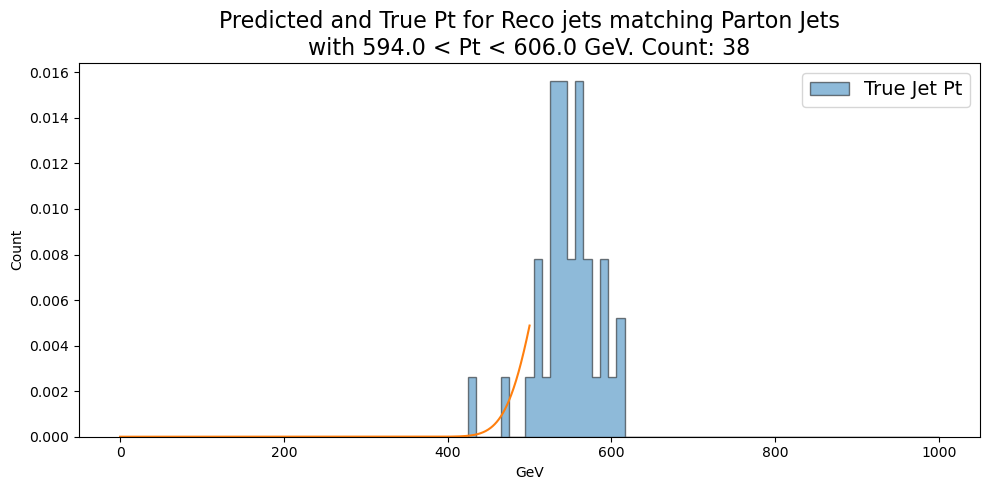

In [44]:
range_highs = [100, 130, 130, 200, 225, 250, 300, 400, 700, 1000]
range_lows = [0, 0, 0, 0, 25, 25, 0, 0, 0, 0]
j = 0
means = []
stdDevs = []
pt = []
for center in [20, 50, 75, 100, 125, 150, 200, 250, 300, 600]:        
    recoPt = []
    low = center - center/100
    high = center + center/100
    for i in range(len(data)):
        if (data[i, 0] > low and data[i, 0] < high):
            recoPt.append(data[i, 4])
    mean = np.mean(recoPt)
    stdDev = np.std(recoPt)
    means.append(mean)
    stdDevs.append(stdDev)
    pt.append(center)
    print(mean)
    print(stdDev)
    bins = np.linspace(range_lows[j], range_highs[j], 100)
    x = np.linspace(0, 500, 1000)
    pdf = normPDF(x, mean, stdDev)
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = fig.add_subplot(111)
    ax.hist(recoPt, density=True, bins=bins, label='True Jet Pt', alpha=0.5, ec="k", histtype='stepfilled')
    ax.plot(x, pdf)
    ax.set_xlabel("GeV")
    ax.set_ylabel("Count")
    ax.set_title("\n".join(wrap("Predicted and True Pt for Reco jets matching Parton Jets with {} < Pt < {} GeV. Count: {}".format(low, high, len(recoPt)), width=60)), fontsize=16)
    #ax.axvline(x=center/2)

    ax.legend(fontsize=14)
    plt.tight_layout()
    #ax.set_yscale('log')
    plt.show()
    #fig.savefig(save_dir+"/PtDistLog{}.png".format(j), facecolor="white", transparent="True")
    j+=1


In [6]:
j = 0
means = []
stdDevs = []
pt = []
interval = 2
for high in np.arange(22, 200, interval): 
    recoPt = []
    low = high - interval
    for i in range(len(data)):
        if (data[i, 0] > low and data[i, 0] < high):
            recoPt.append(data[i, 4])
    mean = np.mean(recoPt)
    stdDev = np.std(recoPt)
    means.append(mean)
    stdDevs.append(stdDev)
    pt.append(high - 1)
    print(len(recoPt))
    j+=1


44684
40562
37511
34731
32630
31017
29430
28038
26708
25546
24800
23827
22615
21843
20978
20228
19655
18740
17985
17457
16611
16015
15407
14928
14192
13688
13054
12596
11886
11562
11069
10608
10175
9856
9191
8929
8558
8230
7791
7578
7077
6930
6404
6071
5829
5646
5211
5105
4862
4624
4298
4251
3957
3879
3676
3395
3358
3105
3025
2903
2733
2574
2471
2360
2292
2185
1968
1906
1785
1724
1671
1653
1443
1431
1431
1411
1308
1182
1117
1101
1102
972
975
922
921
801
855
748
765


[ 0.90923223 -1.65022159]


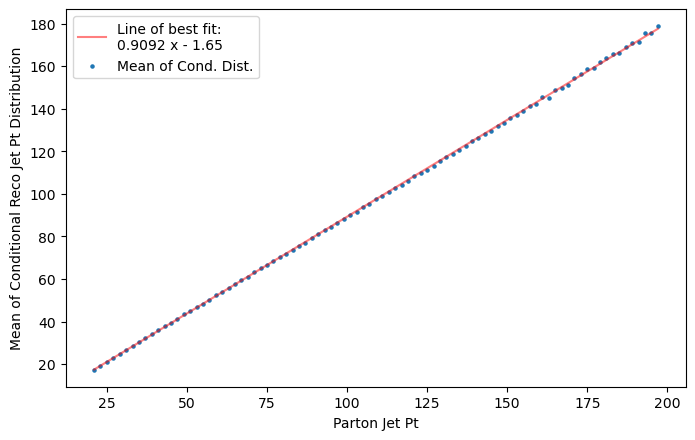

In [17]:
coef = np.polyfit(pt,means,1)
print(coef)
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111)
poly1d_fn = np.poly1d(coef)

ax.scatter(pt, means, s=5, label='Mean of Cond. Dist.')
ax.plot(pt, poly1d_fn(np.array(pt)), alpha=0.5, c='r', label='Line of best fit:'+str(poly1d_fn))
ax.set_xlabel('Parton Jet Pt')
ax.set_ylabel('Mean of Conditional Reco Jet Pt Distribution')
ax.set_title('')
ax.legend()
plt.show()

[0.01101888 2.92408837]


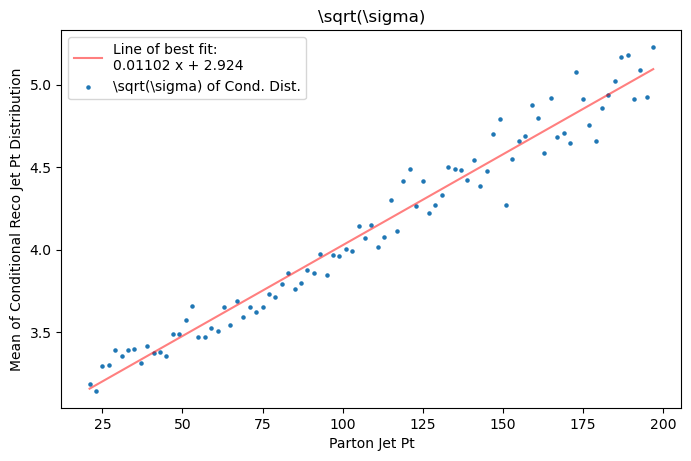

In [24]:
coef = np.polyfit(pt,np.sqrt(stdDevs),1)
print(coef)
poly1d_fn = np.poly1d(coef)

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(pt, np.sqrt(stdDevs), s=5, label=r'\sqrt(\sigma) of Cond. Dist.')
ax.plot(pt, poly1d_fn(pt), alpha=0.5, c='r', label='Line of best fit:'+str(poly1d_fn))
ax.set_xlabel('Parton Jet Pt')
ax.set_ylabel('Mean of Conditional Reco Jet Pt Distribution')
ax.set_title(r'\sqrt(\sigma)')
ax.legend()
plt.show()
#plt.scatter(pt, stdDevs)
#plt.plot(pt, poly1d_fn(pt)**2, alpha=1, c='r')
#plt.show()